## 常用的數值取代：中位數與分位數連續數值標準化

- **中位數** (median) : np.median(value_array)
- **分位數** (quantiles) : np.quantile(value_array, q=...)
- **眾數** (mode) : *較慢* scipy.stats.mode(value_array) / *較快* dictionary method
- **平均數** (mean) : np.mean(value_array)

#### 連續行數值標準化
改變一單位的 x2 對 target_y 的影響完全不同

是否依定要座標轉化？
看使用的模型而定：
- Regression model:有差
- Tree-based model:沒差

**Is it a good practice to always scale/normalize data for machine learning?**

- Good:  
-- 某些演算法 (如 SVM, DL) 等，對權重敏感或對損失函數平滑程度有幫助者  
-- 特徵間的量量級差異異甚⼤

- Bad:  
-- 有些指標，如相關不適合在有標準化的空間進⾏  
-- 量量的單位在某些特徵上是有意義的

### 作業

1. 列出 AMT_ANNUITY 的 q0 - q100

2. 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

3. 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

4. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. 列出 AMT_ANNUITY 的 q0 - q100

In [3]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [4]:
five_qunt = [0,25,50,75,100]
quant_5s = [np.percentile(df[~df['AMT_ANNUITY'].isnull()].AMT_ANNUITY, i) for i in five_qunt]

quant_5s

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]

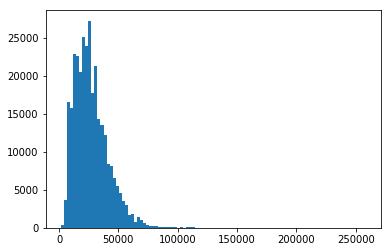

In [5]:
plt.hist(df[~df['AMT_ANNUITY'].isnull()].AMT_ANNUITY, bins=100)
plt.show()

In [6]:
# 試著將 max 取代為 q99

df[df['AMT_ANNUITY'] == df['AMT_ANNUITY'].max()] = np.percentile(df[~df['AMT_ANNUITY'].isnull()].AMT_ANNUITY,99)


In [7]:
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27107.962463
std       14487.960432
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

### 2. 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [8]:
ann_med = np.median(df[~df['AMT_ANNUITY'].isnull()].AMT_ANNUITY)

In [9]:
df['AMT_ANNUITY'].fillna(ann_med, inplace=True)

In [10]:
df['AMT_ANNUITY'].describe()

count    307511.000000
mean      27107.876419
std       14487.684294
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

### 3. 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

In [11]:
value = df['AMT_ANNUITY'].values

In [12]:
df['AMT_NORM1'] = (value-np.mean(value))/(np.std(value))
df['AMT_NORM2'] = (value-np.min(value))/(np.max(value)-np.min(value))

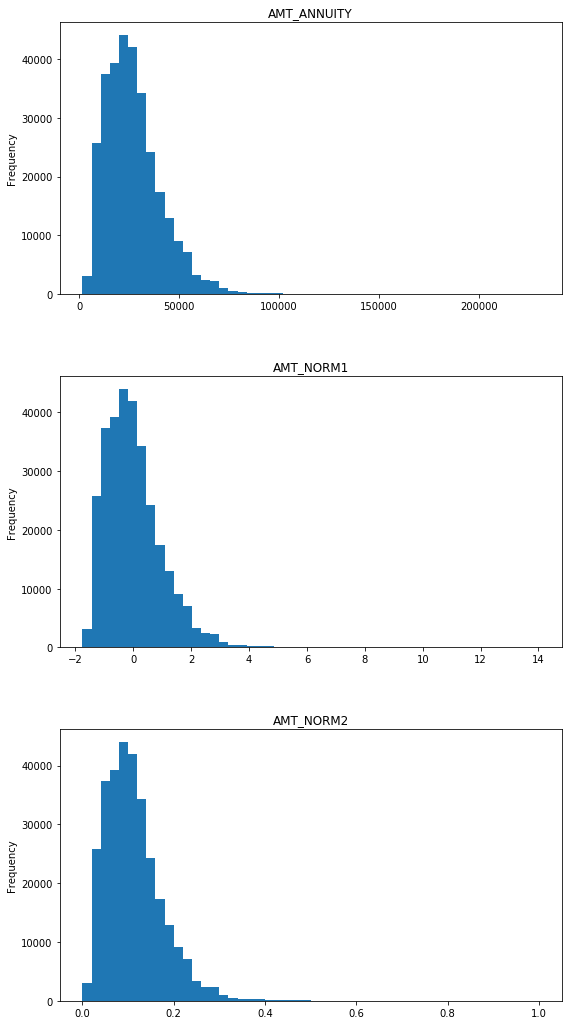

In [21]:
fig, axes = plt.subplots(3,1,figsize=(9,18))
fig.subplots_adjust(hspace=0.3)

df['AMT_ANNUITY'].plot(kind='hist', bins = 50, ax=axes[0], title = 'AMT_ANNUITY')
df['AMT_NORM1'].plot(kind = 'hist', bins = 50, ax=axes[1], title = 'AMT_NORM1')
df['AMT_NORM2'].plot(kind = 'hist', bins = 50, ax=axes[2], title = 'AMT_NORM2')

plt.show()

### 4. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [27]:
# 計算眾數 (mode)
from scipy.stats import mode
import time

start_time = time.time()
made_get = mode(df[~df['AMT_GOODS_PRICE'].isnull()].AMT_GOODS_PRICE)
print(made_get)
print('Elapsed time: %.3f secs' % (time.time() - start_time))

ModeResult(mode=array([450000.]), count=array([26022]))
Elapsed time: 0.552 secs


In [31]:
# 計算眾數 (mode)
# 較快速的方式 dictionary

from collections import defaultdict 
# desaultdict
# dict subclass that calls a factory function to supply missing values

start_time = time.time()
made_dict = defaultdict(lambda:0)

for value in df[~df['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']:
    made_dict[value] += 1

made_get = sorted(made_dict.items(), key = lambda i:i[1], reverse=True)

print(made_get[0])
print("Elapse time: %.3f secs" % (time.time()-start_time))

(450000.0, 26022)
Elapse time: 0.260 secs
